In [1]:
import pandas as pd                                     #importing all necesary libraries
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  


In [2]:
salary_data = pd.read_csv("Salary_Data.csv")             #loading salary_data

In [3]:
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


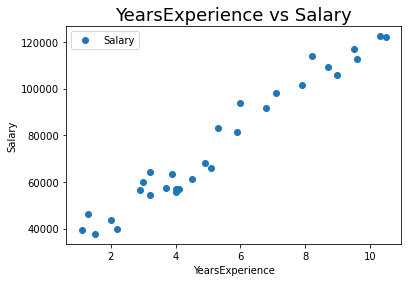

In [4]:
salary_data.plot(x='YearsExperience', y='Salary', style='o')  
plt.title('YearsExperience vs Salary', fontsize= 18)      # Plotting Years of experience vs salary
plt.xlabel('YearsExperience',fontsize = 10)  
plt.ylabel('Salary',fontsize = 10)  
plt.show()

#### The graph shows positive linear realtion between years of experience and salary 

### Preparing data for analysis

In [5]:
X = salary_data.iloc[:, :-1].values       
y = salary_data.iloc[:, 1].values  
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,             #splitting the data into training and testing sets
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**

In [7]:
from sklearn.linear_model import LinearRegression                     #Training the data
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed")

Training completed


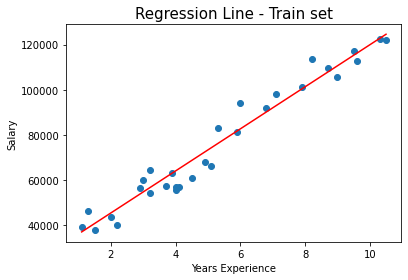

In [8]:
line = regressor.coef_*X+regressor.intercept_                          # Plotting the regression line
plt.scatter(X, y)  
plt.plot(X, line, color = "red");
plt.xlabel("Years Experience", fontsize = 10)
plt.ylabel("Salary", fontsize = 10)
plt.title("Regression Line - Train set", fontsize = 15,)
plt.show()

### Making the predictions

In [9]:
print(X_test)                                                      # Testing data - experience
y_pred = regressor.predict(X_test)                                 # Predicting the salary

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})          #Comparison between predicted and test data
df 

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


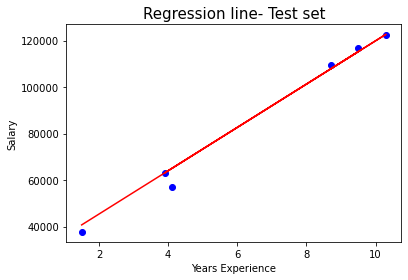

In [11]:
plt.plot(X_test, y_pred, color = "red") 
plt.scatter(X_test, y_test, color = "blue")                          #Using scatter plot for test data set
plt.xlabel("Years Experience", fontsize = 10)
plt.ylabel("Salary", fontsize = 10)
plt.title("Regression line- Test set", fontsize =15)
plt.show()

### Accuracy of the Model

In [12]:
from sklearn import metrics                                             #Calculating Accuracy of the model
metrics.r2_score(y_test, y_pred)

0.988169515729126

### 98% Accuracy of the model

In [13]:
predict_score = regressor.predict([[8.2]])
print("The salary for years of experience 8.2 -- ", predict_score)

The salary for years of experience 8.2 --  [103143.21518981]


In [14]:
print('Mean Square Error', metrics.mean_squared_error(y_test, y_pred))

Mean Square Error 12823412.298126562


In [15]:
print('Model R^2 Square value', metrics.r2_score(y_test, y_pred))

Model R^2 Square value 0.988169515729126
